# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Step 0 | Setup and Imports

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [1]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
drive_path = '/content/drive/MyDrive/'
project_folder = 'Econ_0150_Project/'
os.chdir(drive_path + project_folder)

In [3]:
# Check which files are in your Project folder
os.listdir()

['gdp-per-capita-worldbank.gsheet',
 'happiest-countries-in-the-world-2025.csv',
 'gdp-per-capita-worldbank.csv',
 'cleaned_data.csv',
 'Copy of Project_Template.ipynb']

In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [5]:
# Once you've mounted Google Drive, you can open a dataset from your project folder
data1 = pd.read_csv('gdp-per-capita-worldbank.csv')
data2 = pd.read_csv('happiest-countries-in-the-world-2025.csv')
# And you can save your dataset after you've worked on it.
data1.to_csv('cleaned_data.csv')
data2.to_csv('cleaned_data.csv')

## Step 1 (Part 1) | Univariate EDA

Summarize the main variables of interest.

In [6]:
data1.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2021 international $)",World regions according to OWID
0,Afghanistan,AFG,2000,1617.8264,NaN
1,Afghanistan,AFG,2001,1454.1108,NaN
2,Afghanistan,AFG,2002,1774.3087,NaN
3,Afghanistan,AFG,2003,1815.9282,NaN
4,Afghanistan,AFG,2004,1776.9182,NaN


In [7]:
data2.head()

,flagCode,country,WorldHappinessScore_2024
0,FI,Finland,7.74
1,DK,Denmark,7.58
2,IS,Iceland,7.53
3,SE,Sweden,7.34
4,IL,Israel,7.34


## Step 2 (Part 2) | Bivariate EDA

Visualize the main relationships of interest.

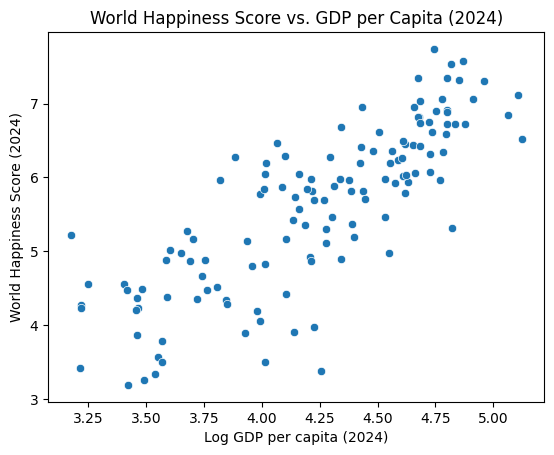

In [26]:
from logging import log
# Extract 2024 GDP per capita and prepare for merge
gdp_2024 = data1[data1['Year'] == 2024][['Entity', 'GDP per capita, PPP (constant 2021 international $)']].copy()
gdp_2024 = gdp_2024.rename(columns={'Entity': 'country', 'GDP per capita, PPP (constant 2021 international $)': 'current_gdp_percap'})

# Add log of current_gdp_percap to gdp_2024
gdp_2024['log_gdp_percap'] = np.log10(gdp_2024['current_gdp_percap'])

# Prepare happiness score data for merge
happiness_data = data2[['country', 'WorldHappinessScore_2024']].copy()
happiness_data = happiness_data.rename(columns={'WorldHappinessScore_2024': 'happiness_score'})

# Merge the two dataframes on 'country'
merged_data = pd.merge(gdp_2024, happiness_data, on='country', how='inner')

# Plot scatter plot
sns.scatterplot(data=merged_data, x='log_gdp_percap', y='happiness_score')





plt.title('World Happiness Score vs. GDP per Capita (2024)')
plt.xlabel('Log GDP per capita (2024)')
plt.ylabel('World Happiness Score (2024)')
plt.show()

Text(0, 0.5, 'World Happiness Score (2024)')

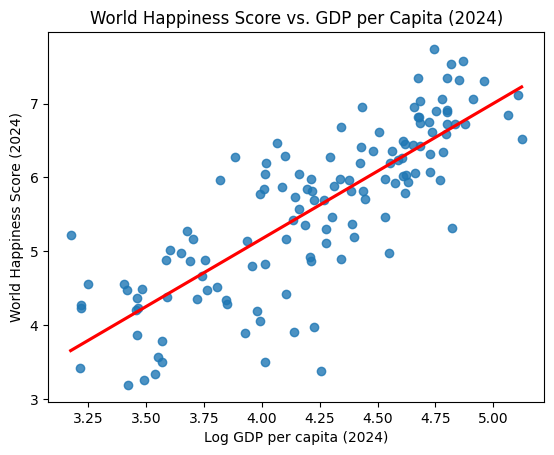

In [32]:
sns.regplot(data=merged_data, x='log_gdp_percap', y='happiness_score', line_kws={'color': 'red'}, ci=None)
plt.title('World Happiness Score vs. GDP per Capita (2024)')
plt.xlabel('Log GDP per capita (2024)')
plt.ylabel('World Happiness Score (2024)')

Text(0, 0.5, 'Residuals')

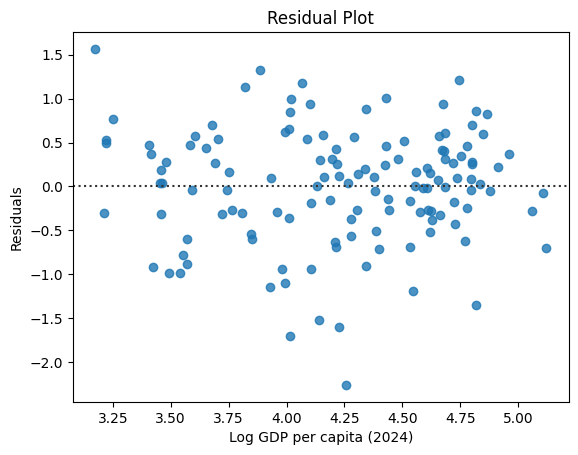

In [36]:
#Create a residual plot
sns.residplot(data=merged_data, x='log_gdp_percap', y='happiness_score')
plt.title('Residual Plot')
plt.xlabel('Log GDP per capita (2024)')
plt.ylabel('Residuals')

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

In [ ]:
model = smf.ols(formula='happiness_score ~ log_gdp_percap', data=merged_data)
print(model.fit().summary().tables[1])

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.1655      0.502     -4.316      0.000      -3.158      -1.173
log_gdp_percap     1.8333      0.118     15.567      0.000       1.600       2.066
